In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

base_dir=r'D:\kaggle\ab test'
os.chdir(base_dir)



In [2]:
df = pd.read_csv('cookie_cats.csv')
df.head()


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [3]:
# check missing value
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

In [8]:
df.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


In [25]:
min_n = min(n_groups)
n_groups/min_n * 100

array([100.        , 101.76510067])

The number of samples of two groups are roughly the same.

In [29]:
# group info
groups = df.groupby('version').count().index.values
n_groups = df.groupby('version')['userid'].count().values
print('Group {0} have {1} samples, respectively.'.format(groups, n_groups))
df.groupby('version')[['sum_gamerounds','retention_1','retention_7']].mean()

Group ['gate_30' 'gate_40'] have [44700 45489] samples, respectively.


,sum_gamerounds,retention_1,retention_7
version,,,
gate_30,52.456264,0.448188,0.190201
gate_40,51.298776,0.442283,0.182000


In [35]:
df[['sum_gamerounds','retention_1','retention_7']].mean()

sum_gamerounds    51.872457
retention_1        0.445210
retention_7        0.186065
dtype: float64

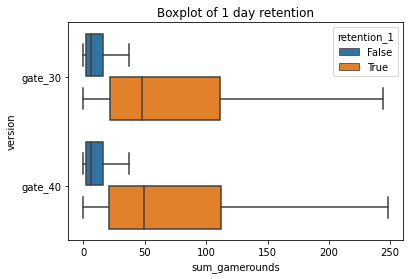

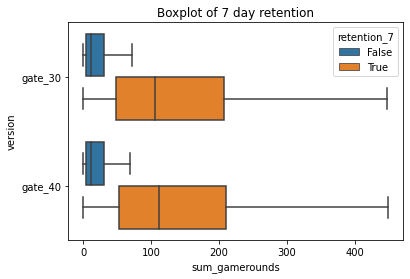

In [26]:
# visuallization

sns.boxplot(x=df['sum_gamerounds'], y=df['version'], hue=df['retention_1'], showfliers=False)
plt.title('Boxplot of 1 day retention')
plt.show()
sns.boxplot(x=df['sum_gamerounds'], y=df['version'], hue=df['retention_7'], showfliers=False)
plt.title('Boxplot of 7 day retention')
plt.show()

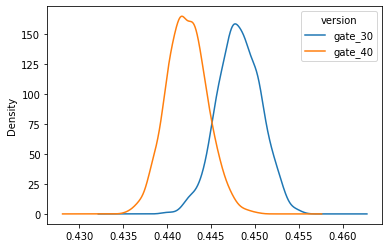

In [36]:
# one day retention
# Bootstrapping
boot_1d = []
for i in range(1000):
    boot_mean = df.sample(frac = 1,replace = True).groupby('version')['retention_1'].mean() # with replacement
    boot_1d.append(boot_mean)
    
# Transforming the list to a DataFrame
boot_1d = pd.DataFrame(boot_1d)
# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density')
plt.show()

Probability that 1-day retention is greater when the gate is at level 30: 0.958


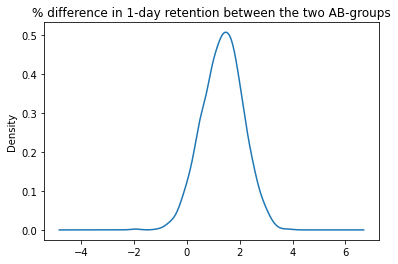

In [37]:
# Adding a column with the % difference between the two AB-groups
boot_1d['diff'] = (boot_1d.gate_30 - boot_1d.gate_40)/boot_1d.gate_40*100

# Ploting the bootstrap % difference
ax = boot_1d['diff'].plot(kind='density')
ax.set_title('% difference in 1-day retention between the two AB-groups')

# Calculating the probability that 1-day retention is greater when the gate is at level 30
print('Probability that 1-day retention is greater when the gate is at level 30:',(boot_1d['diff'] > 0).mean())

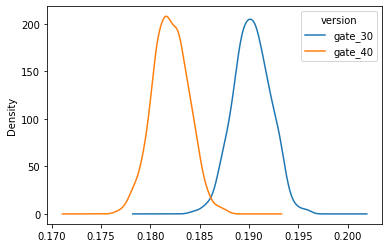

In [39]:
# 7 days retention
# Bootstrapping
boot_7d = []
for i in range(1000):
    boot_mean = df.sample(frac = 1,replace = True).groupby('version')['retention_7'].mean() # with replacement
    boot_7d.append(boot_mean)
# Transforming the list to a DataFrame
boot_7d = pd.DataFrame(boot_7d)
# A Kernel Density Estimate plot of the bootstrap distributions
boot_7d.plot(kind='density')
plt.show()

Probability that 7-day retention is greater when the gate is at level 30: 0.998


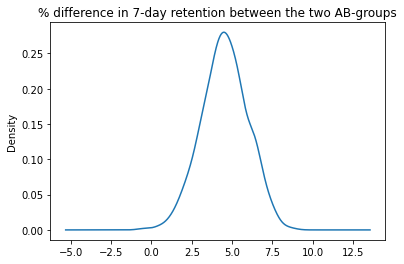

In [41]:
# Adding a column with the % difference between the two AB-groups
boot_7d['diff'] = (boot_7d.gate_30 - boot_7d.gate_40)/boot_7d.gate_40*100

# Ploting the bootstrap % difference
ax = boot_7d['diff'].plot(kind='density')
ax.set_title('% difference in 7-day retention between the two AB-groups')

# Calculating the probability that 7-day retention is greater when the gate is at level 30
print('Probability that 7-day retention is greater when the gate is at level 30:',(boot_7d['diff'] > 0).mean())